In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session




# Cargando los datos

In [ ]:
df = pd.read_csv('../input/predict-diabetes-based-on-diagnostic-measures/diabetes.csv')
df.head()

Limpiando los datos

In [ ]:
df["chol_hdl_ratio"] = df["chol_hdl_ratio"].str.replace(",",".").astype(float)
df["bmi"] = df["bmi"].str.replace(",",".").astype(float)
df["waist_hip_ratio"] = df["waist_hip_ratio"].str.replace(",",".").astype(float)

In [ ]:
sns.pairplot(df, hue = "gender")

In [ ]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values



Cambiaremos aquellas variables categoricas a numericas usando sklearn

In [ ]:
from sklearn import preprocessing
lbl_x = preprocessing.LabelEncoder()
lbl_y = preprocessing.LabelEncoder()
x[:,5] = lbl_x.fit_transform(x[:,5])
y = lbl_y.fit_transform(y)

# Usando la eliminación hacia atras para eliminar variables que no tienen tanta influencia en el modelo

In [ ]:
x
import statsmodels.api as sm
def backwardElimination(x, sl):    
    numVars = len(x[0])    
    for i in range(0, numVars):        
        regressor_OLS = sm.OLS(y, x.tolist()).fit()        
        maxVar = max(regressor_OLS.pvalues).astype(float)        
        if maxVar > sl:            
            for j in range(0, numVars - i):                
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):                    
                    x = np.delete(x, j, 1)    
    regressor_OLS.summary()    
    return x 
SL = 0.05
X_opt = x[:, 0:13]
X_Modeled = backwardElimination(X_opt, SL)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

Normalizando las variables

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# Probamos la precisión de los datos despues de que hemos eliminado las variables que estadisticamente hablando no aportan mucho

**Regresion Logistica**

In [ ]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression().fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = regressor.predict(x_test)
accuracy_score(y_test, y_pred)


**XGBOOST**

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(use_label_encoder =False, eval_metric='mlogloss').fit(x_train, y_train)
y_pred2 = xgbc.predict(x_test)
accuracy_score(y_test, y_pred2)

# Conclusiones y Curiosidades

Tenemos que reconocer que dentro de este desarrollo se encontro que:

**1** Si normalizamos X en vez de normalizar x_train y x_test podemos observar que la eliminación hacia atras solo nos dejara 1 variable la cual lograra igualmente predecir casi tan bien como lo hacen las 5 variables seleccionadas (como podemos observar en la siguiente imagen)

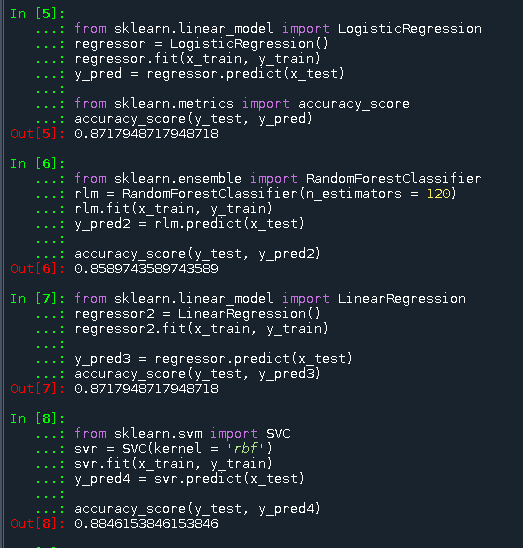

**2** Es de tener en cuenta que debido al tamaño tan pequeño de este dataset puede existir mucha varianza respecto a unas predicciones más grandes

**3** Se puede tener en cuenta que solo analizando "glucose", "age", "waist", "hip", "waist_hip_ratio" tendremos muy buenos resultados

**4** En la prueba con diferentes modelos podemos observar que su porcentaje de precisión varia entre un 4% y un 8% (Como se puede apreciar en la imagen)
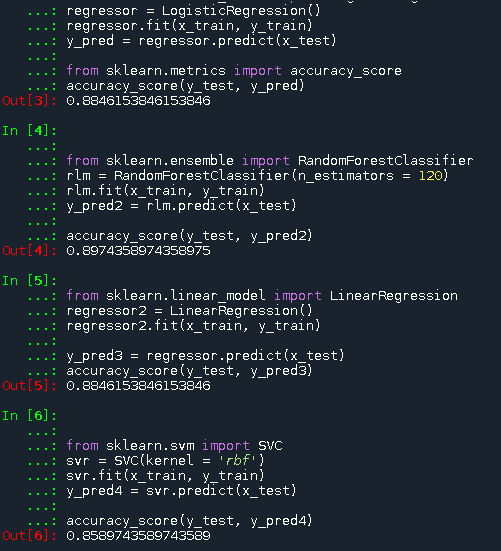
